<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Разделение-выборки" data-toc-modified-id="Разделение-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение выборки</a></span></li><li><span><a href="#Кодирование-категориальных-признаков" data-toc-modified-id="Кодирование-категориальных-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Кодирование категориальных признаков</a></span></li><li><span><a href="#Масштабирование-количественных-признаков" data-toc-modified-id="Масштабирование-количественных-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Масштабирование количественных признаков</a></span></li><li><span><a href="#Моделирование,-выбор-наилучшей-модели" data-toc-modified-id="Моделирование,-выбор-наилучшей-модели-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Моделирование, выбор наилучшей модели</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Метод-увеличения-выборки.-Upsampling" data-toc-modified-id="Метод-увеличения-выборки.-Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Метод увеличения выборки. Upsampling</a></span></li><li><span><a href="#Уменьшение-выборки.-Downsampling" data-toc-modified-id="Уменьшение-выборки.-Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки. Downsampling</a></span></li><li><span><a href="#Выбор-наилучшей-модели" data-toc-modified-id="Выбор-наилучшей-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выбор наилучшей модели</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
#описательная статистика по выборке
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# приведем наименования столбцов к нижнему регистру и snake_case
df.columns = df.columns.str.lower()

In [7]:
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [8]:
df.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard',
       'is_active_member', 'estimated_salary', 'exited']

In [10]:
df.head(20)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [11]:
# в признаке tenure есть пропуски, посмотрим на значения в данном столбце
df['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [12]:
# посмотрим на ту часть выборки, в которой присутствуют пропуски
df[df['tenure'].isna()]

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [13]:
# заменим пропуски на 0 как на наиболее вероятное значение в данном столбце
# приведем значения столбца к целочисленному виду

df['tenure'] = df['tenure'].fillna(0).astype('int64')

In [14]:
# повторно выведем всю информацию о выборке
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_crcard        10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
#уберем лишние для построения модели столбцы
# столбец row_number дублирует индексы таблицы, столбец customer_id и surname никак не влияют на целевой признак

df = df.drop(['row_number', 'customer_id', 'surname'], axis=1)

In [16]:
# вывод размера преобразованной таблицы
df.shape

(10000, 11)

In [17]:
# проверим корреляцию количественных признаков с целью проверки данных на мультиколлинеарность
df.drop(['has_crcard', 'is_active_member', 'exited'], axis=1). corr()

,credit_score,age,tenure,balance,num_of_products,estimated_salary
credit_score,1.000000,-0.003965,0.003087,0.006268,0.012238,-0.001384
age,-0.003965,1.000000,-0.007368,0.028308,-0.030680,-0.007201
tenure,0.003087,-0.007368,1.000000,-0.005821,0.010106,0.011225
balance,0.006268,0.028308,-0.005821,1.000000,-0.304180,0.012797
num_of_products,0.012238,-0.030680,0.010106,-0.304180,1.000000,0.014204
estimated_salary,-0.001384,-0.007201,0.011225,0.012797,0.014204,1.000000


In [18]:
# проверка на полные дубликаты
df.duplicated().sum()

0

In [19]:
# проверим распределение классов в целевом признаке

df['exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

<div class="alert alert-info"> 
<b> ВЫВОД:</b>

Выборка состоит из 10000 объектов. Есть информация по 14 признакам, 
из них значимыми для модели могут быть 12 (включая, целевой признак).

Целевой признак категориальный, перед моделью будет стоять задача бинарной классификации.
Есть 4 категориальных признака, остальные признаки количественные.
    
Согласно описательноый статистике наибольший разброс значений у признаков balance и estamated_salary, что ожидаемо. В целом, явных выбросов в распределении значений признаков не обнаружено.

В выборке не обнаружены полные дубликаты, но есть пропуски в признаке tenure (сколько лет человек является клиентом банка),
пропуски заменены наиболее подходящим по смыслу значением.

Признаки проверены на мультиколлинеарность, проблема не обнаружена.

Внутри выборки присутствует неравномерность распределения объектов по целевому признаку. 
Значений 0 (клиенты, которые остались в банке)
почти в 4 раза больше, чем 1 (клиенты,которые ушли из банка).

</div>

## Исследование задачи

### Разделение выборки

In [21]:
# разделим выборку сначала на 2 части - обучающую и валидационную + тестовую
# при разделении используем стратифицированную выборку для того, чтобы повторить распределение классов целевой переменной

df_train, df_valid_test = train_test_split(df, test_size=0.4, random_state=12345, stratify= df['exited'])

In [22]:
# разделим валидационную+тестовую часть выборки на валидационную и тестовую соответсвенно
# соотношение размеров выборок обучающая : валидационная : тестовая - 60% : 20% : 20%

df_valid, df_test = \
 train_test_split(df_valid_test, test_size=0.5, random_state=12345, stratify = df_valid_test['exited'])

In [23]:
# проверим размеры выборок
df_train.shape

(6000, 11)

In [24]:
df_valid.shape

(2000, 11)

In [25]:
df_test.shape

(2000, 11)

### Кодирование категориальных признаков

In [26]:
# проведем кодирование категориальных признаков c помощью OneHotEncoder
ohe = OneHotEncoder(sparse= False, drop='first')
ohe.fit(df_train[['geography','gender']]) 

def get_ohe(df):
    df_ohe = pd.DataFrame(data = ohe.transform(df[['geography','gender']]), columns = ohe.get_feature_names())
    df.drop(columns=['geography','gender'], axis=1, inplace = True)
    df = pd.concat([df.reset_index(drop=True), df_ohe], axis = 1)
    return df
    
df_train = get_ohe(df_train)
df_valid = get_ohe(df_valid) 
df_test = get_ohe(df_test) 

In [27]:
df_train.head()

,credit_score,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,exited,x0_Germany,x0_Spain,x1_Male
0,549,49,6,124829.16,1,0,1,93551.36,0,1.0,0.0,0.0
1,694,38,0,195926.39,1,1,1,85522.84,0,0.0,0.0,0.0
2,660,34,8,106486.66,2,0,1,182262.66,0,0.0,0.0,1.0
3,632,41,0,81877.38,1,1,1,33642.21,0,1.0,0.0,0.0
4,580,56,1,131368.30,1,1,0,106918.67,1,0.0,0.0,0.0


In [28]:
df_train.shape

(6000, 12)

### Масштабирование количественных признаков

In [29]:
# обозначим целевой признак и остальные признаки
features_train = df_train.drop('exited', axis=1)
target_train = df_train['exited']

features_valid = df_valid.drop('exited', axis=1)
target_valid = df_valid['exited']

features_test = df_test.drop('exited', axis=1)
target_test = df_test['exited']

In [30]:
# проведем масштабирование количественных признаков 

numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric])  

### Моделирование, выбор наилучшей модели

Построим следующие модели классификации:
- Решающее дерево
- Логистическая регрессия
- Случайный лес

Оценим качество моделей при помощи f1 меры.

In [31]:
# построим модель решающего дерева
# изменяя глубину дерева выберем модель с наилучшей f1-метрикой

def find_best_DT(maxmax_depth, class_weight, features, target): 
    f1_scores = []
    for depth in range(1,maxmax_depth):
        model = DecisionTreeClassifier(random_state=12345, max_depth = depth, class_weight = class_weight)
        model.fit(features, target)
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        f1_scores.append(f1)
    DT_results = pd.DataFrame({'max_depth' : pd.Series(range(1,maxmax_depth)),
                              'f1_score' : f1_scores})
    return DT_results


best_DT = find_best_DT(21, None, features_train, target_train)
display(best_DT)

print('Наилучший результат решающего дерева:')
print(best_DT[best_DT['f1_score'] == best_DT['f1_score'].max ()])

,max_depth,f1_score
0,1,0.000000
1,2,0.520349
2,3,0.537572
3,4,0.520635
4,5,0.545455
5,6,0.574468
6,7,0.592486
7,8,0.567073
8,9,0.558824
9,10,0.545455


Наилучший результат решающего дерева:
   max_depth  f1_score
6          7  0.592486


Наилучший результат f1 метрики модели решающего дерева достигается при глубине 7, f1 = 0.59

In [32]:
# построим модель логистической регрессии, посмотрим на результаты f1 метрики

model_log = LogisticRegression(solver = 'liblinear', random_state=12345)
model_log.fit(features_train, target_train)
predictions_valid_log = model_log.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid_log)
print('F1-score:', f1)

F1-score: 0.3076923076923077


Значение F1 метрики у модели логистической регрессии составило 0,31.

In [33]:
#построим модель случайного леса, варьируя количеством деревьев от 10 до 200 с шагом 10 и 
# и максимальной глубиной деревьев в каждой из моделей

def find_best_RF(n_est, maxmax_depth, class_weight, features, target): 
    f1_scores = []
    n_estimators = []
    max_depth = []
    for est in range(10, n_est, 10):
        for depth in range(1,maxmax_depth):
            n_estimators.append(est)
            max_depth.append(depth)
            model = RandomForestClassifier(n_estimators = est, random_state=12345, max_depth = depth, \
                                           class_weight = class_weight)
            model.fit(features, target)
            predictions_valid = model.predict(features_valid)
            f1 = f1_score(target_valid, predictions_valid)
            f1_scores.append(f1)
            RF_results = pd.DataFrame({'n_estimators': n_estimators,
                                        'max_depth' : max_depth,
                                        'f1_score' : f1_scores})
    return RF_results


best_RF = find_best_RF(200, 21, None, features_train, target_train)
display(best_RF.head(15))

print('Наилучший результат модели случайного леса:')
print(best_RF[best_RF['f1_score'] == best_RF['f1_score']. max()])

,n_estimators,max_depth,f1_score
0,10,1,0.000000
1,10,2,0.227957
2,10,3,0.253165
3,10,4,0.525790
4,10,5,0.542811
5,10,6,0.537459
6,10,7,0.563780
7,10,8,0.583717
8,10,9,0.584759
9,10,10,0.600000


Наилучший результат модели случайного леса:
    n_estimators  max_depth  f1_score
57            30         18  0.618076


Наилучший результат f1 метрики достигается при количестве деревьев равном 30, максимальной глубине 18.
F1 метрика составила 0,62.

In [34]:
# посмотрим на метрики precision, recall, f1 и roc_auc_score для каждого вида модели 
# возьмем наилучшую модель каждого типа

#функция подсчета метрик модели

def get_metrics(model, features, target):
    model.fit(features, target)
    predictions = model.predict(features_valid)
    precision = precision_score(target_valid,predictions)
    recall = recall_score(target_valid,predictions)
    f1 = f1_score(target_valid,predictions)
    auc_roc = roc_auc_score(target_valid,model.predict_proba(features_valid)[:, 1])
    return precision, recall, f1, auc_roc

# считаем метрики для модели решающего дерева
best_model_dt = DecisionTreeClassifier(random_state=12345, max_depth = 7)
metrics_dt = get_metrics(best_model_dt, features_train, target_train)
print(f'Наилучшая модель решающего дерева: precision = {metrics_dt[0] : .4f}, \
   recall = {metrics_dt[1]: .4f}, f1 = {metrics_dt[2]: .4f}, auc_roc = {metrics_dt[3]: .4f}')

# считаем метрики для модели логистической регрессии
model_log = LogisticRegression(solver = 'liblinear', random_state=12345)
metrics_log = get_metrics(model_log, features_train, target_train)
print(f'Mодель логистической регрессии: precision = {metrics_log[0] : .4f}, \
   recall = {metrics_log[1]: .4f}, f1 = {metrics_log[2]: .4f}, auc_roc = {metrics_log[3]: .4f}')

# считаем метрики для модели случайного леса
best_model_rf = RandomForestClassifier(n_estimators = 30, max_depth = 18, random_state=12345)
metrics_rf = get_metrics(best_model_rf, features_train, target_train)
print(f'Наилучшая модель случайного леса: precision = {metrics_rf[0] : .4f}, \
  recall = {metrics_rf[1]: .4f}, f1 = {metrics_rf[2]: .4f}, auc_roc = {metrics_rf[3]: .4f}')

Наилучшая модель решающего дерева: precision =  0.7218,    recall =  0.5025, f1 =  0.5925, auc_roc =  0.8247
Mодель логистической регрессии: precision =  0.6087,    recall =  0.2059, f1 =  0.3077, auc_roc =  0.7876
Наилучшая модель случайного леса: precision =  0.7626,   recall =  0.5196, f1 =  0.6181, auc_roc =  0.8548


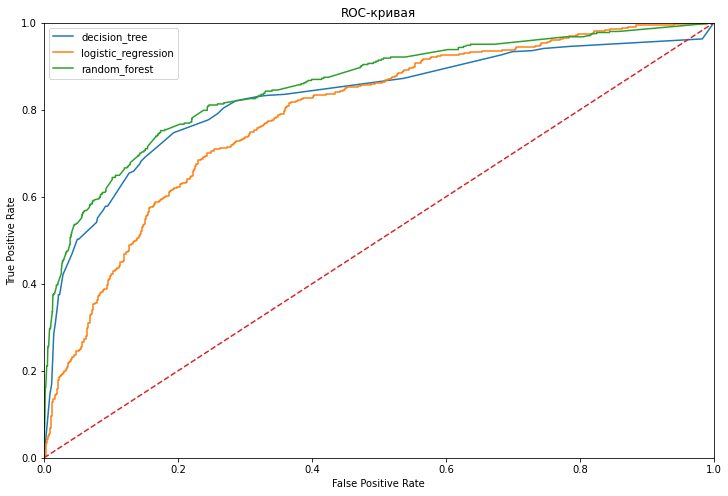

In [35]:
#построим roc-curve для каждой модели

plt.figure(figsize=(12,8))
fpr, tpr, thresholds = roc_curve(target_valid, best_model_dt.predict_proba(features_valid)[:, 1]) 
plt.plot(fpr, tpr, label ='decision_tree')

fpr, tpr, thresholds = roc_curve(target_valid, model_log.predict_proba(features_valid)[:, 1]) 
plt.plot(fpr, tpr, label = 'logistic_regression')

fpr, tpr, thresholds = roc_curve(target_valid, best_model_rf.predict_proba(features_valid)[:, 1]) 
plt.plot(fpr, tpr, label = 'random_forest')

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()

# roc-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()


Наилучшее значение метрик и ROC-кривой у модели случайного леса.

<div class="alert alert-info"> 
<b> ВЫВОД:</b>

Перед построением модели были проведены прямое кодирование (поскольку есть несколько категориальных признаков), 
а также масштабирование количественных признаков (разброс показателей количественных признаков различный, 
для адекватной оценки их значимости моделью, необходимо привести к единому масштабу).
   
Затем были исследованы три модели классификации с изменением гиперпараметров:
    
   1. Модель решающего дерева: показала наилучший показатель f1 0.59 метрики в  при глубине дерева 7
    
   2. Модель линейной регрессии: f1 =  0.31
    
   3. Модель случайного леса: наилучший показатель f1 составил 0.62
   
Наибольший показатель F1-меры  у модели случайного леса (0.62), затем - модель решающего дерева (0.59), 
на третьем месте - модель линейной регрессии (0.31).
    
Проведено сравнение моделей по другим метрикам (precision, recall, roc_auc), а также построены ROC-кривые.
На основании данного сравнения выбрана модель случайного леса с фиксированным количеством деревьев и максимальной глубиной.
    
Поработаем над устранением дисбаланса классов целевого признака для улучшения показателей.

</div>

## Борьба с дисбалансом

Поработаем с дисбалансом классов в целевом признаке при помощи следующих методов:

    - Взвешивание классов
    - Увеличение выборки (добавление объектов редкого класса)
    - Уменьшение выборки (сокращение объектов популярного класса)

### Взвешивание классов

In [36]:
# применим взвешивание классов для модели решающего дерева
best_DT_weighted = find_best_DT(21, "balanced", features_train, target_train)
display(best_DT_weighted)

print('Наилучший результат решающего дерева со взвешенными классами:')
print(best_DT_weighted[best_DT_weighted['f1_score'] == best_DT_weighted['f1_score']. max ()])

,max_depth,f1_score
0,1,0.484653
1,2,0.498011
2,3,0.520710
3,4,0.560932
4,5,0.554649
5,6,0.575926
6,7,0.575045
7,8,0.549411
8,9,0.541586
9,10,0.527147


Наилучший результат решающего дерева со взвешенными классами:
   max_depth  f1_score
5          6  0.575926


In [37]:
# применим взвешивание классов для модели логистической регрессии

model_log = LogisticRegression(solver = 'liblinear', random_state=12345, class_weight = 'balanced')
model_log.fit(features_train, target_train)
predictions_valid_log = model_log.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid_log)
print('F1-score:', f1)

F1-score: 0.5302897278314311


In [38]:
# применим взвешивание классов для модели случайного леса
best_RF_weighted = find_best_RF(200, 21, "balanced", features_train, target_train)
display(best_RF_weighted.head(15))

print('Наилучший результат модели случайного леса cсо взвешенными классами:')
print(best_RF_weighted[best_RF_weighted['f1_score'] == best_RF_weighted['f1_score'].max()])


,n_estimators,max_depth,f1_score
0,10,1,0.496938
1,10,2,0.579624
2,10,3,0.580407
3,10,4,0.614271
4,10,5,0.611452
5,10,6,0.617954
6,10,7,0.626033
7,10,8,0.634093
8,10,9,0.625866
9,10,10,0.618877


Наилучший результат модели случайного леса cсо взвешенными классами:
     n_estimators  max_depth  f1_score
287           150          8  0.655666


Метод взвешивания классов помог улучшить качество моделей логистической регрессии и случайного леса. Максимального значения f1 метрики удалось достичь для модели случайного леса с максимальной глубиной  равной 8 и количеством деревьев равным 150. F1 = 0.656

### Метод увеличения выборки. Upsampling

In [39]:
# увеличиваем выборку с помощью добавления объектов с редким классом по целевому признаку


def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [40]:
# проверим размер увеличенной выборки

features_upsampled.shape

(9666, 11)

In [41]:
# проверим распределение целевого признака в увеличенной выборке

target_upsampled.value_counts()

1    4888
0    4778
Name: exited, dtype: int64

In [42]:
# построим модель решающего дерева, варьируя глубиной дерева

best_DT_upsampled = find_best_DT(21, None, features_upsampled, target_upsampled)
display(best_DT_upsampled)

print('Наилучший результат решающего дерева на увеличенной выборке:')
print(best_DT_upsampled[best_DT_upsampled['f1_score'] == best_DT_upsampled['f1_score']. max ()]) 

,max_depth,f1_score
0,1,0.484653
1,2,0.498011
2,3,0.498011
3,4,0.560932
4,5,0.554649
5,6,0.575926
6,7,0.575045
7,8,0.549232
8,9,0.540856
9,10,0.531746


Наилучший результат решающего дерева на увеличенной выборке:
   max_depth  f1_score
5          6  0.575926


In [43]:
# построим модель логистической регрессии 

model_log = LogisticRegression(solver = 'liblinear', random_state=12345)
model_log.fit(features_upsampled, target_upsampled)
predictions_valid_log = model_log.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid_log)
print('Результат модели логистической регрессии: F1-score=', f1)

Результат модели логистической регрессии: F1-score= 0.5246753246753246


In [44]:
# построим модель случайного леса, обучим ее на увеличенной выборке
best_RF_upsampled = find_best_RF(200, 21, None, features_upsampled, target_upsampled)
display(best_RF_upsampled.head(15))

print('Наилучший результат модели случайного леса на увеличенной выборке:')
print(best_RF_upsampled[best_RF_upsampled['f1_score'] == best_RF_upsampled['f1_score'].max()])

,n_estimators,max_depth,f1_score
0,10,1,0.493573
1,10,2,0.556918
2,10,3,0.570435
3,10,4,0.604331
4,10,5,0.602941
5,10,6,0.610202
6,10,7,0.627490
7,10,8,0.620833
8,10,9,0.626556
9,10,10,0.622560


Наилучший результат модели случайного леса на увеличенной выборке:
     n_estimators  max_depth  f1_score
110            60         11  0.648339


Метод увеличения обучающей выборки с помощью добавления элементов с редким классом по целевому признаку также помог улучшить показатели 
f1-метрики для логистической регрессии и модели случайного леса (по сравнению с несбалансированной классификацией). Наилучший показатель f1 снова показывает модель случайного леса, F1=0.648.

### Уменьшение выборки. Downsampling

In [45]:
#уменьшаем выборку, убирая часть объектов с популярным классом в целевом признаке

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.26)

In [46]:
# проверим размер уменьшенной выборки
features_downsampled.shape

(2464, 11)

In [47]:
#  проверим распределение целевого класса в уменьшенной выборке
target_downsampled.value_counts()

0    1242
1    1222
Name: exited, dtype: int64

In [48]:
# построим модель решающего дерева и обучим ее на новой выборке
best_DT_downsampled = find_best_DT(21, None, features_downsampled, target_downsampled)
display(best_DT_downsampled)

print('Наилучший результат решающего дерева на уменьшенной выборке:')
print(best_DT_downsampled[best_DT_downsampled['f1_score'] == best_DT_downsampled['f1_score']. max ()])  

,max_depth,f1_score
0,1,0.510469
1,2,0.542995
2,3,0.564777
3,4,0.554260
4,5,0.590068
5,6,0.567731
6,7,0.569609
7,8,0.566787
8,9,0.549333
9,10,0.541935


Наилучший результат решающего дерева на уменьшенной выборке:
   max_depth  f1_score
4          5  0.590068


In [49]:
#построим модель логистической регрессии и обучим ее на новой выборке
model_log = LogisticRegression(solver = 'liblinear', random_state=12345)
model_log.fit(features_downsampled, target_downsampled)
predictions_valid_log = model_log.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid_log)
print('Результат модели логистической регрессии: F1-score=', f1)

Результат модели логистической регрессии: F1-score= 0.5286343612334803


In [50]:
#построим модель случайного леса и обучим ее на новой выборке
best_RF_downsampled = find_best_RF(200, 21, None, features_downsampled, target_downsampled)
display(best_RF_downsampled.head(15))

print('Наилучший результат модели случайного леса на уменьшенной выборке:')
print(best_RF_downsampled[best_RF_downsampled['f1_score'] == best_RF_downsampled['f1_score'].max()])

,n_estimators,max_depth,f1_score
0,10,1,0.567460
1,10,2,0.578269
2,10,3,0.609108
3,10,4,0.608000
4,10,5,0.604563
5,10,6,0.611586
6,10,7,0.613971
7,10,8,0.609450
8,10,9,0.597183
9,10,10,0.604167


Наилучший результат модели случайного леса на уменьшенной выборке:
     n_estimators  max_depth  f1_score
367           190          8  0.637512


Метод уменьшения обучающей выборки путем сокращения количества элементов с популярным классом целевого признака также дает наилучшие результаты для модели случайного леса (максимальное значение f1 =0.637). Он позволяет улучшить метрику для модели логистической регрессии и модели случайного леса и не дает результат для модели решающего дерева (по сравнению с несбалансированной классификацией).

### Выбор наилучшей модели

Применение методов устранения дисбаланса классов целевого признака позволили улучшить показатели качества модели (f1 метрику). Наилучшие результаты наблюдаем у моделей случайного леса. 
Сравним три модели с наибольшим показателем F1 меры при использовании взвешенных классов, увеличенной обучающей выборки, уменьшенной обучающей выборки. Подсчитаем другие метрики качества.

In [51]:
# посмотрим на метрики precision, recall, f1, auc_roc на каждой модели

# наилучшая модель при использовании взвешивания классов
model_weight = RandomForestClassifier(random_state=12345, n_estimators=150, max_depth=8, class_weight = 'balanced')
metrics_weight = get_metrics(model_weight, features_train, target_train)
print(f'Показатели наилучшей модели взвешенных классов: precision = {metrics_weight[0] : .4f},\
   recall = {metrics_weight[1]: .4f}, f1 = {metrics_weight[2]: .4f}, auc_roc = {metrics_weight[3]: .4f}')

#наилучшая модель при использовании увеличения обучающей выборки
model_upsampled = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=11) 
metrics_upsampled = get_metrics(model_upsampled, features_upsampled, target_upsampled)
print(f'Показатели наилучшей модели с upsampling: precision = {metrics_upsampled[0] : .4f},\
   recall = {metrics_upsampled[1]: .4f}, f1 = {metrics_upsampled[2]: .4f}, auc_roc = {metrics_upsampled[3]: .4f}')
                                
#наилучшая модель при использовании уменьшения обучающей выборки
model_downsampled = RandomForestClassifier(random_state=12345, n_estimators=190, max_depth=8) 
metrics_downsampled = get_metrics(model_downsampled, features_downsampled, target_downsampled)
print(f'Показатели наилучшей модели с upsampling: precision = {metrics_downsampled[0] : .4f},\
   recall = {metrics_downsampled[1]: .4f}, f1 = {metrics_downsampled[2]: .4f}, auc_roc = {metrics_downsampled[3]: .4f}')


Показатели наилучшей модели взвешенных классов: precision =  0.5948,   recall =  0.7304, f1 =  0.6557, auc_roc =  0.8704
Показатели наилучшей модели с upsampling: precision =  0.6086,   recall =  0.6936, f1 =  0.6483, auc_roc =  0.8709
Показатели наилучшей модели с upsampling: precision =  0.5282,   recall =  0.8039, f1 =  0.6375, auc_roc =  0.8707


Модель со взвешенными классами выигрывает по показателю f1, модель с использованием downsampling лучшая по показателю полноты. При этом метрика precision наиболее высокая у моделей взвешенных классов и модели с upsampling.

Поскольку для нашей задачи в первую очередь важна высокая точность (нам важно,чтобы модель как можно чаще верно предсказывала уход клиента из банка, тогда будет верно расходоваться бюджет на удержание клиента), затем полнота предсказаний, то выберем модель случайного леса со взвешенными классами (у нее достаточно высокая точность и максимальная f1-мера). Эту модель будем проверять на тестовой выборке.

<div class="alert alert-info"> 
<b> ВЫВОД:</b>

Для устранения дисбаланса классов целевого признака были применены следующие методы:
    
  - Взвешивание классов
  - Увеличение выборки (добавление объектов редкого класса)
  - Уменьшение выборки (сокращение объектов популярного класса)

Все эти методы не сработали на модели решающего дерева, но позволили увеличить метрику f1 для моделей логистической регрессии и случайного леса.

Для моделей случайного леса можно было наблюдать наибольшие показатели метрики. 

Были изучены другие метрики качества (precision, recall, auc_roc). 
Наиболее адекватной поставленной задаче выбрана модель случайного леса с максимальной глубиной 8, 
количеством деревьев 150 и взвешенными классами.
</div>

## Тестирование модели

In [52]:
# проверим модель на тестовой выборке, сравним показатели с полученными ранеее метриками на валидационной выборке

print(f'Показатели наилучшей на валидационной выборке: precision = {metrics_weight[0] : .4f},\
   recall = {metrics_weight[1]: .4f}, f1 = {metrics_weight[2]: .4f}, auc_roc = {metrics_weight[3]: .4f}')

model = RandomForestClassifier(random_state=12345, n_estimators=150, max_depth=8, class_weight = 'balanced')
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
recall_test = recall_score(target_test, predictions_test)
precision_test = precision_score(target_test, predictions_test)
f1_test = f1_score(target_test, predictions_test)
auc_roc_test = roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])
print(f'Показатели модели на тестовой выборке: precision = {precision_test : .4f},\
   recall = {recall_test: .4f}, f1 = {f1_test: .4f}, auc_roc = {auc_roc_test: .4f}')

Показатели наилучшей на валидационной выборке: precision =  0.5948,   recall =  0.7304, f1 =  0.6557, auc_roc =  0.8704
Показатели модели на тестовой выборке: precision =  0.5650,   recall =  0.6830, f1 =  0.6185, auc_roc =  0.8551


In [53]:
#оценим вменяемость модели в сравнении с base line моделью, которая всегда прогнозирует уход клиента

model_dummy = DummyClassifier(strategy = "constant", constant = 1, random_state = 12345)
model_dummy.fit(features_train, target_train)
f1_dummy = f1_score(target_test, model_dummy.predict(features_test))
precision_dummy = precision_score(target_test, model_dummy.predict(features_test))
recall_dummy = recall_score(target_test, model_dummy.predict(features_test))
auc_roc_dummy = roc_auc_score(target_test, model_dummy.predict_proba(features_test)[:, 1])

print(f'Показатели baseline модели на тестовой выборке: precision = {precision_dummy : .4f},\
   recall = {recall_dummy: .4f}, f1 = {f1_dummy: .4f}, auc_roc = {auc_roc_dummy: .4f}')

Показатели baseline модели на тестовой выборке: precision =  0.2035,   recall =  1.0000, f1 =  0.3382, auc_roc =  0.5000


Показатель baseline модели гораздо ниже полученных нами показателей. Можно считать, что модель прошла проверку на вменяемость. 

<div class="alert alert-info"> 
<b> ВЫВОД:</b>
    Была протестирована выбранная наилучшая модель (модель случайного леса с фиксированной максимальной глубиной и количеством деревьев, со взвешенными весами признаков).

   Метрики качества снизились по сравнению с работой модели на валидационной выборке. Возможно переобучение модели.
Однако удалось сильно повысить показатели по сравнению с наилучшей моделью несбалансированной классификации. 
    
   Можно сделать вывод, что устранение дисбаланса данных позитивно сказалось на качестве итоговой модели. Удалось достичь показателя F1 = 0.62, AUC_ROC = 0.86.
</div>

## Итоговый вывод

- Была исследована задача прогнозирования оттока банковских клиентов при заданных признаках: изучены данные, выявлены закономерности, проведена подготовка данных к моделированию (прямое кодирование, разделение на обучающую, валидационную и тестовую выборки, масштабирование признаков).

- Проведено моделирование при несбалансированной классификации на трех типах моделей с изменением гиперпараметров: решающее дерево, логистическая регрессия, модель случайного леса. Подсчитаны различные метрики качества, выбрана наилучшая модель при дисбалансе данных.

- Проведена работа с дисбалансом данных при помощи различных методов. Наилучшие результаты показала модель случайного леса со взвешенными весами признаков, с фиксированной максимальной глубиной и количеством деревьев.

- Выбранная модель прошла тестовую проверку, в ходе которой удалось достичь показателя F1 = 0.62, AUC_ROC = 0.86, что значительно выше, чем при использовании наилучшей модели на несбалансированных данных. Можно считать, что построенная модель адекватна поставленной задаче. Методы борьбы с дисбалансом данных позитивно повлияли на качество конечной модели.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*